In [173]:
print('*******Netflix_Titles_Rating********')

*******Netflix_Titles_Rating********


In [174]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np
#import statsmodels.api as sm
#import scipy.stats as st
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#import matplotlib.mtab as mlab
%matplotlib inline

In [175]:
df_titles = pd.read_csv('/Users/jaswanthjerripothula/Desktop/Project5@NetflixTitles/netflix_titles.csv')
print(df_titles.shape)

(7787, 12)


In [176]:
df_titles.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [177]:
df_titles.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [178]:
df_titles.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
dtype: int64

In [179]:
df_titles.groupby('type').describe()

release_year                                                         \
               count         mean       std     min     25%     50%     75%   
type                                                                          
Movie         5377.0  2012.920030  9.663282  1942.0  2012.0  2016.0  2018.0   
TV Show       2410.0  2016.191701  5.664826  1925.0  2015.0  2018.0  2019.0   

                 
            max  
type             
Movie    2021.0  
TV Show  2021.0

In [180]:
df_titles.groupby('director').describe()

release_year                                             \
                           count    mean       std     min      25%     50%   
director                                                                      
A. L. Vijay                  2.0  2017.5  2.121320  2016.0  2016.75  2017.5   
A. Raajdheep                 1.0  2020.0       NaN  2020.0  2020.00  2020.0   
A. Salaam                    1.0  1975.0       NaN  1975.0  1975.00  1975.0   
A.R. Murugadoss              2.0  2017.5  0.707107  2017.0  2017.25  2017.5   
Aadish Keluskar              1.0  2018.0       NaN  2018.0  2018.00  2018.0   
...                          ...     ...       ...     ...      ...     ...   
Çagan Irmak                  1.0  2005.0       NaN  2005.0  2005.00  2005.0   
Ísold Uggadóttir             1.0  2018.0       NaN  2018.0  2018.00  2018.0   
Óskar Thór Axelsson          1.0  2017.0       NaN  2017.0  2017.00  2017.0   
Ömer Faruk Sorak             2.0  2007.5  4.949747  2004.0  2005.75  2007.5   
Şenol Sönmez                 2.0  2017.0  2.828427  2015.0  2016.00  2017.0   

                                      
                         75%     max  
director                              
A. L. Vijay          2018.25  2019.0  
A. Raajdheep         2020.00  2020.0  
A. Salaam            1975.00  1975.0  
A.R. Murugadoss      2017.75  2018.0  
Aadish Keluskar      2018.00  2018.0  
...                      ...     ...  
Çagan Irmak          2005.00  2005.0  
Ísold Uggadóttir     2018.00  2018.0  
Óskar Thór Axelsson  2017.00  2017.0  
Ömer Faruk Sorak     2009.25  2011.0  
Şenol Sönmez         2018.00  2019.0  

[4049 rows x 8 columns]

In [181]:
df_titles.groupby('country').describe()

release_year           \
                                                          count     mean   
country                                                                    
Argentina                                                  50.0  2016.18   
Argentina, Brazil, France, Poland, Germany, Den...          1.0  2017.00   
Argentina, Chile                                            1.0  2017.00   
Argentina, Chile, Peru                                      1.0  2015.00   
Argentina, France                                           1.0  2017.00   
...                                                         ...      ...   
Venezuela                                                   1.0  2017.00   
Venezuela, Colombia                                         1.0  2007.00   
Vietnam                                                     5.0  2016.80   
West Germany                                                1.0  1977.00   
Zimbabwe                                                    1.0  2017.00   

                                                                              \
                                                         std     min     25%   
country                                                                        
Argentina                                           6.225982  1985.0  2016.0   
Argentina, Brazil, France, Poland, Germany, Den...       NaN  2017.0  2017.0   
Argentina, Chile                                         NaN  2017.0  2017.0   
Argentina, Chile, Peru                                   NaN  2015.0  2015.0   
Argentina, France                                        NaN  2017.0  2017.0   
...                                                      ...     ...     ...   
Venezuela                                                NaN  2017.0  2017.0   
Venezuela, Colombia                                      NaN  2007.0  2007.0   
Vietnam                                             2.588436  2014.0  2015.0   
West Germany                                             NaN  1977.0  1977.0   
Zimbabwe                                                 NaN  2017.0  2017.0   

                                                                            
                                                       50%     75%     max  
country                                                                     
Argentina                                           2018.0  2019.0  2020.0  
Argentina, Brazil, France, Poland, Germany, Den...  2017.0  2017.0  2017.0  
Argentina, Chile                                    2017.0  2017.0  2017.0  
Argentina, Chile, Peru                              2015.0  2015.0  2015.0  
Argentina, France                                   2017.0  2017.0  2017.0  
...                                                    ...     ...     ...  
Venezuela                                           2017.0  2017.0  2017.0  
Venezuela, Colombia                                 2007.0  2007.0  2007.0  
Vietnam                                             2016.0  2019.0  2020.0  
West Germany                                        1977.0  1977.0  1977.0  
Zimbabwe                                            2017.0  2017.0  2017.0  

[681 rows x 8 columns]

In [182]:
df_titles.groupby('country').count()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
country,,,,,,,,,,,
Argentina,50,50,50,36,46,50,50,50,50,50,50
"Argentina, Brazil, France, Poland, Germany, Denmark",1,1,1,1,1,1,1,1,1,1,1
"Argentina, Chile",1,1,1,1,1,1,1,1,1,1,1
"Argentina, Chile, Peru",1,1,1,1,1,1,1,1,1,1,1
"Argentina, France",1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,1,1,1,1,1,1,1,1,1,1,1
"Venezuela, Colombia",1,1,1,1,0,1,1,1,1,1,1
Vietnam,5,5,5,5,5,5,5,5,5,5,5


In [183]:
df_titles.release_year.value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1966       1
1947       1
1959       1
1964       1
1925       1
Name: release_year, Length: 73, dtype: int64

In [184]:
df_titles.title.value_counts()

Rugrats in Paris: The Movie                  1
XXX: State of the Union                      1
Midnight Diner                               1
Williams                                     1
Frank & Lola                                 1
                                            ..
Monster High: New Ghoul at School            1
Cheuk Wan-Chi: Two Night Stand               1
Sicilian Ghost Story                         1
Rectify                                      1
Iron Man & Captain America: Heroes United    1
Name: title, Length: 7787, dtype: int64

In [186]:
count = 0
for i in df_titles.isnull().sum(axis = 1):
    if i > 0:
        count = count + 1
print('Total number of rows with missing values is :: ',count)
print('It is ',round((count / len(df_titles.index))*100),'percent of the entire dataset the rows with missing values are imputed.')

Total number of rows with missing values is ::  2979
It is  38 percent of the entire dataset the rows with missing values are imputed.


In [187]:
#Imputation :- The NAN or NULL values in the records will be replaced with proper values depending on the nature of data
#Find the null values
df_titles.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'Title Rating\n')

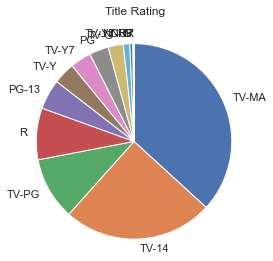

In [188]:
sort_counts = df_titles['rating'].value_counts()
plt.pie(sort_counts, labels = sort_counts.index, startangle = 90, counterclock = False);
plt.axis('square')
plt.title('Title Rating\n')

(array([0, 1]), [Text(0, 0, 'TV Show'), Text(1, 0, 'Movie')])

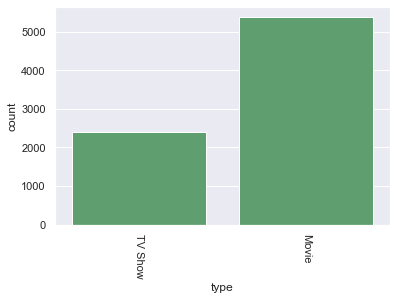

In [189]:
base_color = sn.color_palette()[2]
sn.countplot(data = df_titles, x = 'type', color = base_color)
plt.xticks(rotation = 270)

Text(0.5, 1.0, 'Most Watched Country\n')

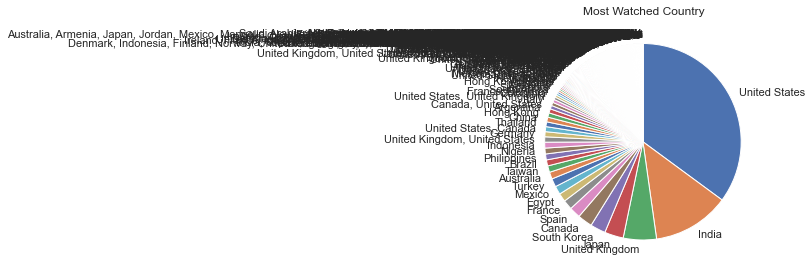

In [190]:
sort_counts = df_titles['country'].value_counts()
plt.pie(sort_counts, labels = sort_counts.index, startangle = 90, counterclock = False);
plt.axis('Square')
plt.title('Most Watched Country\n')

Text(0.5, 1.0, 'Number of releases in each year\n')

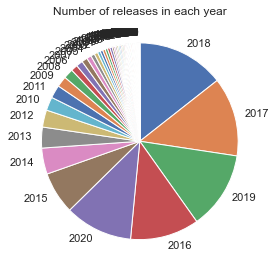

In [191]:
sort_counts = df_titles['release_year'].value_counts()
plt.pie(sort_counts, labels = sort_counts.index, startangle = 90, counterclock = False);
plt.axis('square')
plt.title('Number of releases in each year\n')

In [192]:
df_titles.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [193]:
df_titles.groupby('rating').describe()

release_year                                                   \
                count         mean        std     min      25%     50%   
rating                                                                   
G                39.0  1998.410256  18.039019  1956.0  1990.00  2004.0   
NC-17             3.0  2015.000000   2.645751  2013.0  2013.50  2014.0   
NR               84.0  2010.619048  10.200289  1958.0  2011.00  2014.0   
PG              247.0  2008.935223  10.894722  1973.0  2005.50  2012.0   
PG-13           386.0  2009.318653   9.010211  1955.0  2005.00  2011.0   
R               665.0  2010.601504   9.922698  1962.0  2008.00  2014.0   
TV-14          1931.0  2013.139824   9.938105  1925.0  2012.00  2016.0   
TV-G            194.0  2015.061856   8.327885  1954.0  2015.00  2017.0   
TV-MA          2863.0  2016.368495   5.440300  1945.0  2016.00  2018.0   
TV-PG           806.0  2013.133995  10.757492  1943.0  2013.00  2016.0   
TV-Y            280.0  2016.932143   3.607892  1992.0  2016.00  2018.0   
TV-Y7           271.0  2015.040590   5.798005  1981.0  2013.00  2017.0   
TV-Y7-FV          6.0  2014.833333   2.228602  2012.0  2013.25  2015.0   
UR                5.0  2002.400000  16.318701  1974.0  2007.00  2007.0   

                          
             75%     max  
rating                    
G         2012.5  2020.0  
NC-17     2016.0  2018.0  
NR        2016.0  2018.0  
PG        2017.0  2020.0  
PG-13     2016.0  2020.0  
R         2017.0  2021.0  
TV-14     2018.0  2021.0  
TV-G      2019.0  2021.0  
TV-MA     2019.0  2021.0  
TV-PG     2018.0  2021.0  
TV-Y      2019.0  2021.0  
TV-Y7     2019.0  2021.0  
TV-Y7-FV  2016.0  2018.0  
UR        2008.0  2016.0

In [194]:
df_titles.groupby('title').describe()

release_year                              \
                                     count    mean std     min     25%   
title                                                                    
#Alive                                 1.0  2020.0 NaN  2020.0  2020.0   
#AnneFrank - Parallel Stories          1.0  2019.0 NaN  2019.0  2019.0   
#FriendButMarried                      1.0  2018.0 NaN  2018.0  2018.0   
#FriendButMarried 2                    1.0  2020.0 NaN  2020.0  2020.0   
#Roxy                                  1.0  2018.0 NaN  2018.0  2018.0   
...                                    ...     ...  ..     ...     ...   
忍者ハットリくん                               1.0  2012.0 NaN  2012.0  2012.0   
海的儿子                                   1.0  2016.0 NaN  2016.0  2016.0   
마녀사냥                                   1.0  2015.0 NaN  2015.0  2015.0   
반드시 잡는다                                1.0  2017.0 NaN  2017.0  2017.0   
최강전사 미니특공대 : 영웅의 탄생                    1.0  2018.0 NaN  2018.0  2018.0   

                                                       
                                  50%     75%     max  
title                                                  
#Alive                         2020.0  2020.0  2020.0  
#AnneFrank - Parallel Stories  2019.0  2019.0  2019.0  
#FriendButMarried              2018.0  2018.0  2018.0  
#FriendButMarried 2            2020.0  2020.0  2020.0  
#Roxy                          2018.0  2018.0  2018.0  
...                               ...     ...     ...  
忍者ハットリくん                       2012.0  2012.0  2012.0  
海的儿子                           2016.0  2016.0  2016.0  
마녀사냥                           2015.0  2015.0  2015.0  
반드시 잡는다                        2017.0  2017.0  2017.0  
최강전사 미니특공대 : 영웅의 탄생            2018.0  2018.0  2018.0  

[7787 rows x 8 columns]

In [198]:
df_titles = pd.read_csv('/Users/jaswanthjerripothula/Desktop/Project5@NetflixTitles/netflix_titles.csv', header = None, names = ['show_id', 'release_year', 'title'])
df_titles.set_index('show_id', inplace = True)
print (df_titles.head(50))

                                                release_year  \
show_id                                                        
duration                                           listed_in   
4 Seasons  International TV Shows, TV Dramas, TV Sci-Fi &...   
93 min                          Dramas, International Movies   
78 min                   Horror Movies, International Movies   
80 min     Action & Adventure, Independent Movies, Sci-Fi...   
123 min                                               Dramas   
1 Season     International TV Shows, TV Dramas, TV Mysteries   
95 min                   Horror Movies, International Movies   
119 min                                               Dramas   
118 min                  Horror Movies, International Movies   
143 min       Horror Movies, International Movies, Thrillers   
103 min                                    Dramas, Thrillers   
1 Season   Crime TV Shows, International TV Shows, TV Dramas   
1 Season   Crime TV Shows, Docuseries, I

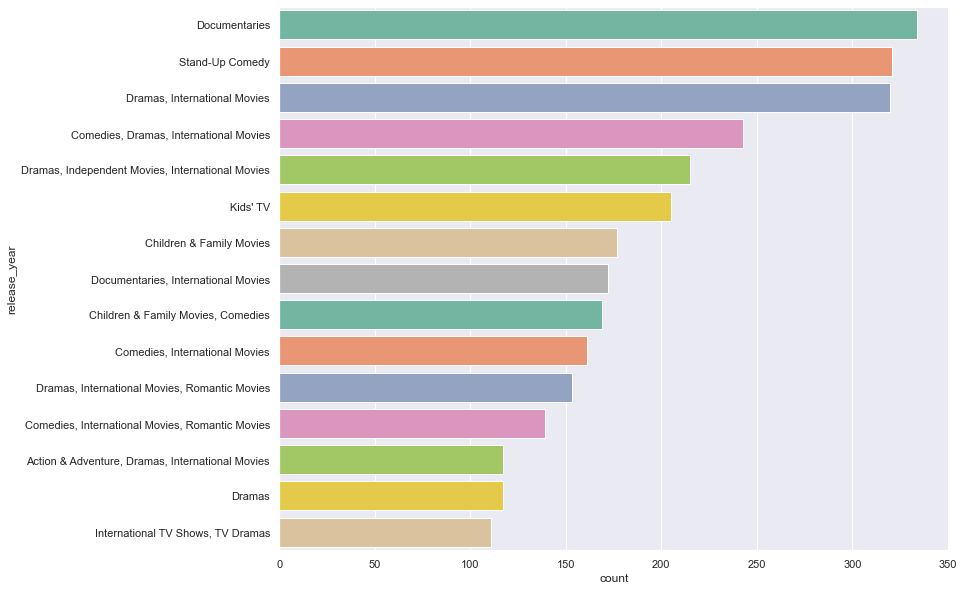

In [196]:
plt.figure(figsize=(12,10))
sn.set(style="darkgrid")
ax = sn.countplot(y="release_year", data=df_titles, palette="Set2", order=df_titles['release_year'].value_counts().index[0:15])

In [205]:
df_titles = pd.read_csv('/Users/jaswanthjerripothula/Desktop/Project5@NetflixTitles/netflix_titles.csv', header = None, names = ['duration', 'Genre', 'Show description'])
df_titles.set_index('duration', inplace = False)


,Genre,Show description
duration,,
duration,listed_in,description
4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
...,...,...
99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [207]:
df_titles.head(21)

,,,,,,,,,duration,Genre,Show description
show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly, Christopher Plummer, Crispin Glover, Martin Landau, Fred Tatasciore, Alan Oppenheimer, Tom Kane",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aaron Yoo, Liza Lapira, Jacob Pitts, Laurence Fishburne, Jack McGee, Josh Gad, Sam Golzari, Helen Carey, Jack Gilpin",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan, Saygın Soysal, Berkan Şal, Metin Belgin, Ayça Eren, Selin Uludoğan, Özay Fecht, Suna Yıldızoğlu",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed El Fishawy, Mahmoud Hijazi, Jihane Khalil, Asmaa Galal, Tara Emad",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Clifton Collins Jr., Tony Plana",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anupam Shyam, Raayo S. Bakhirta, Yashvit Sancheti, Greeva Kansara, Archan Trivedi, Rajiv Pathak",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."


In [208]:
print("***********Netflix_Titles_Rating_project is done successfully*************")

***********Netflix_Titles_Rating_project is done successfully*************
